In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import warnings
pd.set_option('display.float_format', lambda x : '%.30f' % x)
pd.options.display.max_columns = None
pd.options.display.float_format = "{:,.3f}".format
warnings.filterwarnings('ignore')
sns.set()


In [38]:
dataset = pd.read_csv("train.csv")

In [39]:
# dataset[dataset.Age.isin([0.83,0.42])]
# 0<0.83<1

In [40]:
tt = dataset.drop(["Name"],axis=1)
tt['Protocol'] = dataset.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip().title())
tt['Protocol'] = tt['Protocol'].replace(dict.fromkeys(['Mme', 'Ms','Lady','Mlle'],"Miss"))

In [41]:
tt.Protocol.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Sir',
       'Col', 'Capt', 'The Countess', 'Jonkheer'], dtype=object)

In [42]:
tt["Ticket_Type"] = tt.Ticket.apply(lambda x:1 if x.isnumeric() == 0 else 0)

In [43]:
tt.Ticket_Type.value_counts()

0    661
1    230
Name: Ticket_Type, dtype: int64

In [44]:
pd.pivot_table(index="Survived",columns="Ticket_Type",values = "Ticket",aggfunc = "count", data = tt)

Ticket_Type,0,1
Survived,,
0,407,142
1,254,88


In [45]:
print(f"Ratio of Special ticket survival : {88/230*100}")
print(f"Ratio of Numberic ticket survival : {254/661*100}")

Ratio of Special ticket survival : 38.26086956521739
Ratio of Numberic ticket survival : 38.42662632375189


In [46]:
min(list(tt["Age"].unique()))
# tt[tt.Age == 0.83]

0.42

In [47]:
sorted(tt[tt.Protocol == "Miss"].Age.unique()),tt.Protocol

([0.75,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  13.0,
  14.0,
  14.5,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.5,
  31.0,
  32.0,
  33.0,
  34.0,
  36.0,
  37.0,
  39.0,
  40.0,
  41.0,
  42.0,
  45.0,
  58.0,
  nan,
  30.0,
  32.5,
  35.0,
  38.0,
  48.0,
  50.0,
  54.0,
  63.0],
 0        Mr
 1       Mrs
 2      Miss
 3       Mrs
 4        Mr
        ... 
 886     Rev
 887    Miss
 888    Miss
 889      Mr
 890      Mr
 Name: Protocol, Length: 891, dtype: object)

In [48]:
def categorize(x):
    if 0<x<2:
        return "Newborn"
    elif 2<x<5:
        return "Toddler"
    elif 5<x<12:
        return "School-age"
    elif 12<x<20:
        return "Adolescence"
    elif 20<x<35:
        return "Adulthood"
    elif 35<x<55:
        return "Midlife"
    else:
        return "Senior citizen"

In [49]:
tt["Age_Type"] = tt.Age.apply(categorize)
tt.Age_Type.unique()
tt

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Protocol,Ticket_Type,Age_Type
0,1,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr,1,Adulthood
1,2,1,1,female,38.000,1,0,PC 17599,71.283,C85,C,Mrs,1,Midlife
2,3,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Miss,1,Adulthood
3,4,1,1,female,35.000,1,0,113803,53.100,C123,S,Mrs,0,Senior citizen
4,5,0,3,male,35.000,0,0,373450,8.050,NaN,S,Mr,0,Senior citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000,0,0,211536,13.000,NaN,S,Rev,0,Adulthood
887,888,1,1,female,19.000,0,0,112053,30.000,B42,S,Miss,0,Adolescence
888,889,0,3,female,nan,1,2,W./C. 6607,23.450,NaN,S,Miss,1,Senior citizen
889,890,1,1,male,26.000,0,0,111369,30.000,C148,C,Mr,0,Adulthood


# Handling Missing Values

In [50]:
for i in tt.Protocol.unique():
    tt["Age"][(tt.Protocol == i) & (tt.Age.isnull()) ] = round(tt["Age"][tt.Protocol == i].mean(),2)

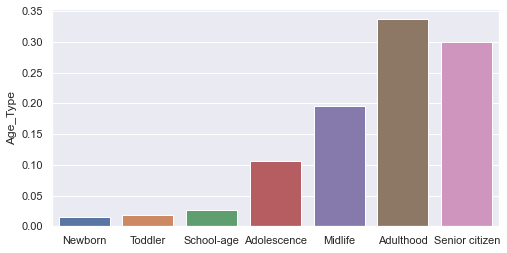

Age_Type,Adolescence,Adulthood,Midlife,Newborn,School-age,Senior citizen,Toddler
Survived,,,,,,,
0,56,186,105,2,16,180,4
1,39,114,70,12,8,87,12


In [51]:
value = tt["Age_Type"].value_counts(normalize = True).iloc[[6,5,4,3,2,0,1]]
plt.figure(figsize = (8,4))
sns.barplot(value.index,value)
plt.show()
pd.pivot_table(index="Survived",columns="Age_Type",values = "Age",data = tt,aggfunc="count")

In [52]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Protocol     891 non-null    object 
 12  Ticket_Type  891 non-null    int64  
 13  Age_Type     891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [53]:
# Making categorical data into nomial
sex = pd.Categorical(tt["Sex"]).categories
tt["Sex"] = pd.Categorical(tt["Sex"]).codes


In [54]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Protocol', 'Ticket_Type',
       'Age_Type'],
      dtype='object')

In [55]:
discrete = tt[['Sex','Protocol', 'Ticket_Type',
       'Age_Type']]

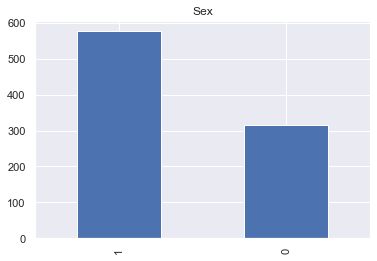

Sex         0    1
Survived          
0          81  468
1         233  109
=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


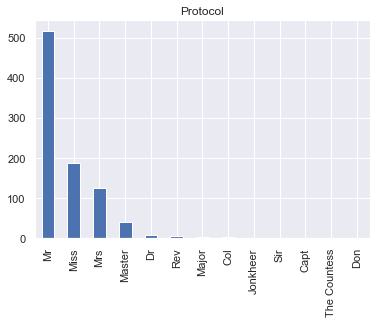

Protocol  Capt   Col   Don    Dr  Jonkheer  Major  Master    Miss      Mr  \
Survived                                                                    
0        1.000 1.000 1.000 4.000     1.000  1.000  17.000  55.000 436.000   
1          nan 1.000   nan 3.000       nan  1.000  23.000 132.000  81.000   

Protocol    Mrs   Rev   Sir  The Countess  
Survived                                   
0        26.000 6.000   nan           nan  
1        99.000   nan 1.000         1.000  
=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


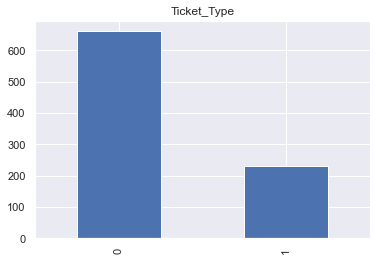

Ticket_Type    0    1
Survived             
0            407  142
1            254   88
=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


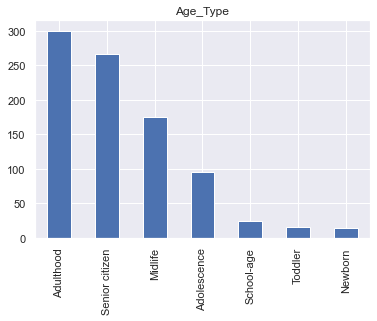

Age_Type  Adolescence  Adulthood  Midlife  Newborn  School-age  \
Survived                                                         
0                  56        186      105        2          16   
1                  39        114       70       12           8   

Age_Type  Senior citizen  Toddler  
Survived                           
0                    180        4  
1                     87       12  
=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


In [56]:
# 
for i in discrete.columns:
    discrete[i].value_counts().plot.bar(title = i)
    plt.show()
    print(pd.pivot_table(index="Survived",values="Age",columns=i ,data = tt,aggfunc="count"))
    print("=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x")

In [57]:
tt.Protocol.value_counts()

Mr              517
Miss            187
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Jonkheer          1
Sir               1
Capt              1
The Countess      1
Don               1
Name: Protocol, dtype: int64

In [58]:
tt.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_Type
PassengerId,1.000,-0.005,-0.035,0.043,0.042,-0.058,-0.002,0.013,-0.072
Survived,-0.005,1.000,-0.338,-0.543,-0.089,-0.035,0.082,0.257,-0.001
Pclass,-0.035,-0.338,1.000,0.132,-0.343,0.083,0.018,-0.549,-0.080
Sex,0.043,-0.543,0.132,1.000,0.116,-0.115,-0.245,-0.182,0.033
Age,0.042,-0.089,-0.343,0.116,1.000,-0.267,-0.197,0.091,0.028
SibSp,-0.058,-0.035,0.083,-0.115,-0.267,1.000,0.415,0.160,0.081
Parch,-0.002,0.082,0.018,-0.245,-0.197,0.415,1.000,0.216,0.036
Fare,0.013,0.257,-0.549,-0.182,0.091,0.160,0.216,1.000,0.173
Ticket_Type,-0.072,-0.001,-0.080,0.033,0.028,0.081,0.036,0.173,1.000


In [59]:
tt[tt["Age"]<12]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Protocol,Ticket_Type,Age_Type
7,8,0,3,1,2.000,3,1,349909,21.075,NaN,S,Master,0,Senior citizen
10,11,1,3,0,4.000,1,1,PP 9549,16.700,G6,S,Miss,1,Toddler
16,17,0,3,1,2.000,4,1,382652,29.125,NaN,Q,Master,0,Senior citizen
24,25,0,3,0,8.000,3,1,349909,21.075,NaN,S,Miss,0,School-age
43,44,1,2,0,3.000,1,2,SC/Paris 2123,41.579,NaN,C,Miss,1,Toddler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,1,1.000,0,2,S.C./PARIS 2079,37.004,NaN,C,Master,1,Newborn
831,832,1,2,1,0.830,1,1,29106,18.750,NaN,S,Master,0,Newborn
850,851,0,3,1,4.000,4,2,347082,31.275,NaN,S,Master,0,Toddler
852,853,0,3,0,9.000,1,1,2678,15.246,NaN,C,Miss,0,School-age


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.000,53.000,40.000,2.000,4.000,4.000,1.000
1,233.000,65.000,40.000,3.000,nan,1.000,nan


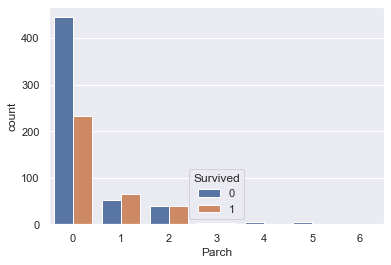

In [60]:
sns.countplot(data = tt , x = 'Parch',hue = "Survived")
pd.pivot_table(index="Survived" , columns="Parch",values = "PassengerId", aggfunc="count",data = tt)

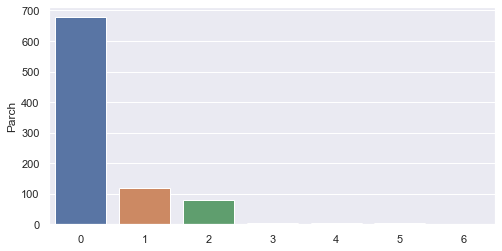

In [61]:
value = tt["Parch"].value_counts()
plt.figure(figsize = (8,4))
sns.barplot(value.index,value)
plt.show()

In [62]:
tt["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

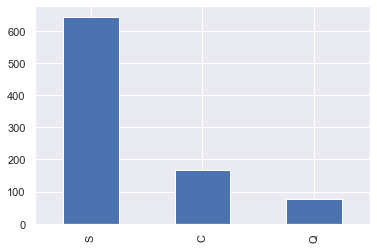

<AxesSubplot:xlabel='Embarked', ylabel='count'>

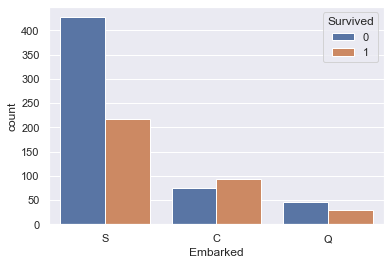

In [63]:
tt.Embarked.value_counts().plot(kind = "bar")
plt.show()
sns.countplot(x = "Embarked",data = tt,hue = "Survived")

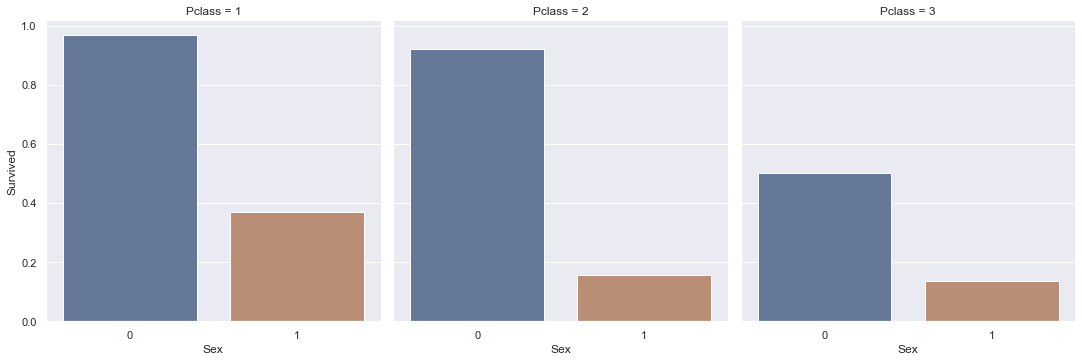

In [68]:
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=tt, kind="bar",
                   saturation=.5, ci=None)

# Fix up the labels
# (g.set_axis_labels('', 'Survival Rate')
#      .set_xticklabels(["Men", "Women"])
#      .set_titles("Class {col_name}")
#      .set(ylim=(0, 1))
#      .despine(left=True, bottom=True))

# # Graph - Actual count of passengers by survival, group and sex
# g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=tt, kind='count', size=7, aspect=.8)

# # Fix up the labels
# (g.set_axis_labels('Suvivors', 'No. of Passengers')
#     .set_xticklabels(["False", "True"])
#     .set_titles('{col_name}')
# )